In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline

In [ ]:
from sklearn.datasets import make_classification

x,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=4)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logic =  LogisticRegression()
logic.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=logic.predict(x_test)

In [ ]:
print(y_pred)

[1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1
 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0
 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1
 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 1
 1 1 0 0 1 0 0 0 1 0 0 0 1 1 1]


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

score= accuracy_score(y_test,y_pred)
print(score)

cm= confusion_matrix(y_test,y_pred)
print(cm)

cr= classification_report(y_test,y_pred)
print(cr)

0.91
[[102   9]
 [  9  80]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       111
           1       0.90      0.90      0.90        89

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



HYPER PARAMETER TUNING AND CROSS VALIDATION


In [ ]:
model = LogisticRegression(max_iter=1000) # Increased max_iter to address ConvergenceWarning

c_value=[100,10,1.0,0.1,0.01]

# Define parameter grid as a list of dictionaries for valid combinations
param_grid = {
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}


print(param_grid)

{'solver': ['lbfgs', 'liblinear'], 'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [ ]:
#grid Search Cv

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

cv=StratifiedKFold(n_splits=2)
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=cv,scoring='accuracy')




In [ ]:
grid

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
grid.best_estimator_

LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')

In [ ]:
grid.best_score_

np.float64(0.90375)

In [ ]:
y_pred= grid.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

score= accuracy_score(y_test,y_pred)
print(score)

cm= confusion_matrix(y_test,y_pred)
print(cm)

cr= classification_report(y_test,y_pred)
print(cr)

0.9
[[100  11]
 [  9  80]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       111
           1       0.88      0.90      0.89        89

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



Randomized serach Sv


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model = LogisticRegression()
randomcv = RandomizedSearchCV(estimator=model,param_distributions=param_grid,cv=cv,n_iter=5,scoring='accuracy')

In [ ]:
randomcv.fit(x_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
                   estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'penalty': ['l2'],
                                        'solver': ['lbfgs', 'liblinear']},
                   scoring='accuracy')

In [ ]:
randomcv.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 1}

In [ ]:
y_pred=randomcv.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

score= accuracy_score(y_test,y_pred)
print(score)

cm= confusion_matrix(y_test,y_pred)
print(cm)

cr= classification_report(y_test,y_pred)
print(cr)

0.91
[[102   9]
 [  9  80]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       111
           1       0.90      0.90      0.90        89

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



Logistic Regression For Multiclass Classification Problem

In [ ]:
from sklearn.datasets import make_classification

x,y=make_classification(n_samples=1000,n_features=10,n_classes=3,n_informative=3,random_state=4)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic =  LogisticRegression(multi_class="ovr")
logistic.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [ ]:
y_pred=logistic.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

score= accuracy_score(y_test,y_pred)
print(score)

cm= confusion_matrix(y_test,y_pred)
print(cm)

cr= classification_report(y_test,y_pred)
print(cr)

0.59
[[67  2  4]
 [ 8 22 34]
 [12 22 29]]
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        73
           1       0.48      0.34      0.40        64
           2       0.43      0.46      0.45        63

    accuracy                           0.59       200
   macro avg       0.56      0.57      0.56       200
weighted avg       0.57      0.59      0.57       200



Logistic Regression For Imbalances Dataset

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification

In [ ]:
x,y =make_classification(n_samples=10000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.99],random_state=1)

In [ ]:
x

array([[ 0.18321261,  0.18451127],
       [ 0.25267276, -0.15122467],
       [ 0.70379513,  1.12768658],
       ...,
       [ 1.82164591,  1.33702327],
       [ 1.4057849 ,  2.16799726],
       [ 0.73801506,  1.01214388]])

In [ ]:
Counter(y)

Counter({np.int64(0): 9853, np.int64(1): 147})

<Axes: xlabel='0', ylabel='1'>

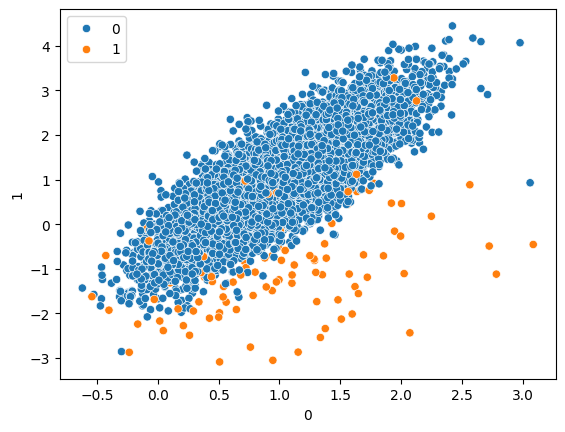

In [ ]:
import seaborn as sns
import pandas as pd

sns.scatterplot(x=pd.DataFrame(x)[0], y=pd.DataFrame(x)[1], hue=y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
##hyperparameter tuning
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
penalty =["l1","l2","elasticnet"]
c_value =[100,10,1.0,0.1,0.01]
solver =["newton-cg","lbfgs","liblinear","sag","saga"]
class_weight =[{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]

In [ ]:
# Define parameter grid as a list of dictionaries for valid combinations of penalty and solver
param_grid_for_imbalanced = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'C': c_value,
        'class_weight': class_weight
    },
    {
        'penalty': ['l2'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'C': c_value,
        'class_weight': class_weight
    },
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],
        'C': c_value,
        'class_weight': class_weight
    }
]

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv=StratifiedKFold(n_splits=2)
grid = GridSearchCV(estimator=model,param_grid=param_grid_for_imbalanced,cv=cv,scoring='accuracy')

In [ ]:
grid.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid=[{'C': [100, 10, 1.0, 0.1, 0.01],
                          'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                           {0: 1, 1: 50}, {0: 1, 1: 100},
                                           {0: 10, 1: 1}, {0: 10, 1: 10},
                                           {0: 10, 1: 50}, {0: 10, 1: 100},
                                           {0: 50, 1: 1}, {0: 50, 1: 10},
                                           {0: 50, 1: 50}, {0: 50, 1: 100},
                                           {0: 100, 1: 1}, {0: 100, 1: 10},
                                           {0: 100, 1: 50}, {0: 100, 1: 1...
                          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                     'saga']},
                         {'C': [100, 10, 1.0, 0.1, 0.01],
                          'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                           {0: 1, 1: 50}, {0: 1, 1: 100},
                                           {0: 10, 1: 1}, {0: 10, 1: 10},
                                           {0: 10, 1: 50}, {0: 10, 1: 100},
                                           {0: 50, 1: 1}, {0: 50, 1: 10},
                                           {0: 50, 1: 50}, {0: 50, 1: 100},
                                           {0: 100, 1: 1}, {0: 100, 1: 10},
                                           {0: 100, 1: 50}, {0: 100, 1: 100}],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy')

In [ ]:
grid.best_params_

{'C': 100,
 'class_weight': {0: 10, 1: 50},
 'penalty': 'l1',
 'solver': 'liblinear'}

In [ ]:
y_pred=grid.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

score= accuracy_score(y_test,y_pred)
print(score)

cm= confusion_matrix(y_test,y_pred)
print(cm)

cr= classification_report(y_test,y_pred)
print(cr)

0.9885
[[1968    4]
 [  19    9]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1972
           1       0.69      0.32      0.44        28

    accuracy                           0.99      2000
   macro avg       0.84      0.66      0.72      2000
weighted avg       0.99      0.99      0.99      2000



Logistic Regression with ROC curve and ROC AUC score

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score
from matplotlib import pyplot

x,y=make_classification(n_samples=1000,n_features=10,n_classes=2,random_state=4)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
dummy_model_prob = [0 for _ in range(len(y_test))]
dummy_model_prob

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
model_prob = model.predict_proba(x_test)

In [ ]:
model_prob =model_prob[:,1]

In [ ]:
dummy_model_auc= roc_auc_score(y_test,dummy_model_prob)
model_auc = roc_auc_score(y_test,model_prob)
print(dummy_model_auc)
print(model_auc)

0.5
0.9644700880655936


In [ ]:
dum_fpr ,dum_tpr,_ = roc_curve(y_test,dummy_model_prob)
model_fpr ,model_tpr,_ = roc_curve(y_test,model_prob)

Text(0, 0.5, 'True Positive Rate')

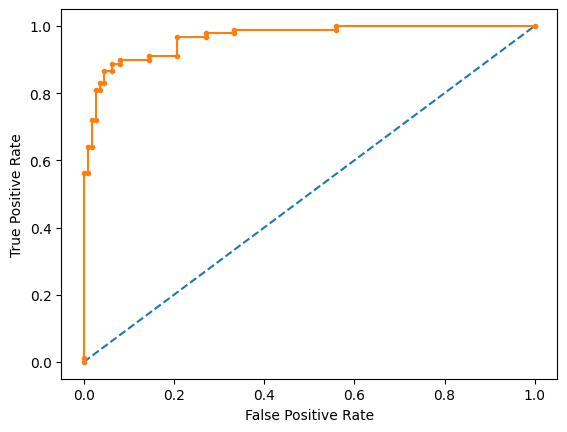

In [ ]:
pyplot.plot(dum_fpr,dum_tpr,linestyle="--",label="Dummy Model")
pyplot.plot(model_fpr,model_tpr,marker=".",label="Model")
pyplot.xlabel("False Positive Rate")
pyplot.ylabel("True Positive Rate")